In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("customer-churn-data-preprocessed.csv")
data.head()

,Unnamed: 0,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,1,0,0,1,29.85,29.85,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,1,0,56.95,1889.50,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,0,0,1,1,53.85,108.15,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,0,0,0,0,0,42.30,1840.75,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,1,70.70,151.65,1,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
X = data.drop(["Churn"],axis = "columns")
y=data["Churn"]

In [5]:
X_train, X_test , y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=800)

In [6]:
X_train.shape

(5625, 46)

In [7]:
X_test.shape

(1407, 46)

In [8]:
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices"

In [9]:
model = keras.Sequential([
    keras.layers.Dense(units=40,input_shape=(46,), activation="relu"),
    keras.layers.Dense(units=15, activation="relu"),
    keras.layers.Dense(units=1,activation="sigmoid")
])

In [10]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [11]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

Epoch 1/100


176/176 [==============================] - 2s 5ms/step - loss: 9.1164 - accuracy: 0.6747 - val_loss: 0.5891 - val_accuracy: 0.7839
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 1.0131 - accuracy: 0.7342 - val_loss: 1.2100 - val_accuracy: 0.7896
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 1.2063 - accuracy: 0.7328 - val_loss: 0.6188 - val_accuracy: 0.7818
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.8599 - accuracy: 0.7493 - val_loss: 0.4896 - val_accuracy: 0.7584
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.7678 - val_loss: 2.5853 - val_accuracy: 0.7690
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.9335 - accuracy: 0.7586 - val_loss: 0.5352 - val_accuracy: 0.8024
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.7572 - val_loss: 1.7832 - val_accuracy: 0.7868
Epoch 8/100

In [12]:
y_predictions = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [13]:
y_predictions[0]

array([0.0179544], dtype=float32)

In [14]:
y_predictions = [1 if prediction > 0.5 else 0 for prediction in y_predictions]

In [15]:
y_predictions[0]

0

In [16]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7932


[0.42469915747642517, 0.7931769490242004]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1046
           1       0.59      0.61      0.60       361

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.80      0.79      0.79      1407



In [19]:
cm = confusion_matrix(y_test, y_predictions)
cm

array([[895, 151],
       [140, 221]], dtype=int64)

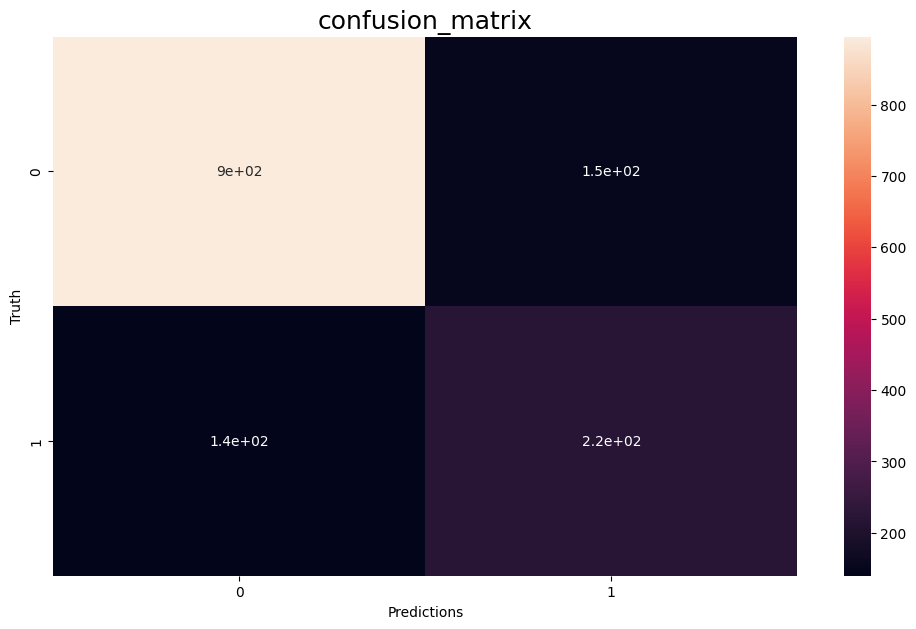

In [20]:
plt.figure(figsize=(12,7))
plt.title("confusion_matrix",fontsize=18)
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()